<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### BIRCH Clustering With MaxAbsScaler

### The Cluster analysis using a simple BIRCH(balanced iterative reducing and clustering using hierarchies) Clustering algorithm and includes 2D and 3D cluster visualization of the Clusters along with feature scaling using MaxAbsScaler.

### Required Packages

In [30]:
!pip install plotly

In [31]:
import operator
import warnings
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
from sklearn.preprocessing import MaxAbsScaler
from sklearn.cluster import Birch
warnings.filterwarnings("ignore")

### Initialization

Filepath of CSV file

In [32]:
file_path = ""

List of features which are required for model training

In [33]:
features=[]

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [34]:
df=pd.read_csv(file_path)
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X.

In [35]:
X = df[features]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [36]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.

In [37]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
X.head()

Age  EstimatedSalary  Gender_Female  Gender_Male
0   19            19000              0            1
1   35            20000              0            1
2   26            43000              1            0
3   27            57000              1            0
4   19            76000              0            1

### Data Rescaling

Scale each feature by its maximum absolute value.

This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.

This scaler can also be applied to sparse CSR or CSC matrices.
##### For more information  [ click here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)

In [38]:
X_Abs=MaxAbsScaler().fit_transform(X)
X_Abs=pd.DataFrame(data = X_Abs,columns = X.columns)
X_Abs.head()

Age  EstimatedSalary  Gender_Female  Gender_Male
0  0.316667         0.126667            0.0          1.0
1  0.583333         0.133333            0.0          1.0
2  0.433333         0.286667            1.0          0.0
3  0.450000         0.380000            1.0          0.0
4  0.316667         0.506667            0.0          1.0

### Model

BIRCH is an unsupervised data mining algorithm used to perform hierarchical clustering over particularly large data-sets. This algorithm can be viewed as an instance or data reduction method, since it reduces the input data to a set of subclusters which are obtained directly from the leaves of the CFT. This reduced data can be further processed by feeding it into a global clusterer. 
#### Tuning Parameter

> **threshold**: The radius of the subcluster obtained by merging a new sample and the closest subcluster should be lesser than the threshold.

> **branching_factor**: Maximum number of CF subclusters in each node. 

> **n_clusters**: Number of clusters after the final clustering step, which treats the subclusters from the leaves as new samples.

[BIRCH API](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html)

In [39]:
model = Birch(branching_factor=60,n_clusters=3,threshold=0.2)
pred_y = model.fit_predict(X_Abs)

### Cluster Analysis

First, we add the cluster labels from the trained model into the copy of the data frame for cluster analysis/visualization.

In [40]:
ClusterDF = X_Abs.copy(deep=True)
ClusterDF['ClusterID'] = pred_y
ClusterDF.head()

Age  EstimatedSalary  Gender_Female  Gender_Male  ClusterID
0  0.316667         0.126667            0.0          1.0          0
1  0.583333         0.133333            0.0          1.0          0
2  0.433333         0.286667            1.0          0.0          1
3  0.450000         0.380000            1.0          0.0          1
4  0.316667         0.506667            0.0          1.0          0

#### Cluster Records
The below bar graphs show the number of data points in each available cluster.

<AxesSubplot:>

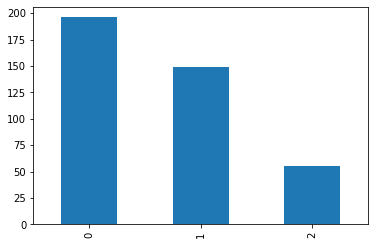

In [41]:
ClusterDF['ClusterID'].value_counts().plot(kind='bar')

#### Cluster Plots
Below written functions get utilized to plot 2-Dimensional and 3-Dimensional cluster plots on the available set of features in the dataset. Plots include different available clusters along with cluster centroid.

In [42]:
def Plot2DCluster(X_Cols,df):
    for i in list(itertools.combinations(X_Cols, 2)):
        plt.rcParams["figure.figsize"] = (8,6)
        xi,yi=df.columns.get_loc(i[0]),df.columns.get_loc(i[1])
        for j in df['ClusterID'].unique():
            DFC=df[df.ClusterID==j]
            plt.scatter(DFC[i[0]],DFC[i[1]],cmap=plt.cm.Accent,label=j)
        plt.xlabel(i[0])
        plt.ylabel(i[1])
        plt.legend()
        plt.show()

def Plot3DCluster(X_Cols,df):
    for i in list(itertools.combinations(X_Cols, 3)):
        xi,yi,zi=df.columns.get_loc(i[0]),df.columns.get_loc(i[1]),df.columns.get_loc(i[2])
        fig,ax = plt.figure(figsize = (16, 10)),plt.axes(projection ="3d")
        ax.grid(b = True, color ='grey',linestyle ='-.',linewidth = 0.3,alpha = 0.2)
        for j in df['ClusterID'].unique():
            DFC=df[df.ClusterID==j]
            ax.scatter3D(DFC[i[0]],DFC[i[1]],DFC[i[2]],alpha = 0.8,cmap=plt.cm.Accent,label=j)
        ax.set_xlabel(i[0])
        ax.set_ylabel(i[1])
        ax.set_zlabel(i[2])
        plt.legend()
        plt.show()
    
def Plotly3D(X_Cols,df):
    for i in list(itertools.combinations(X_Cols,3)):
        xi,yi,zi=df.columns.get_loc(i[0]),df.columns.get_loc(i[1]),df.columns.get_loc(i[2])
        fig2=px.scatter_3d(df, x=i[0], y=i[1],z=i[2],color=df['ClusterID'])
        fig2.show()

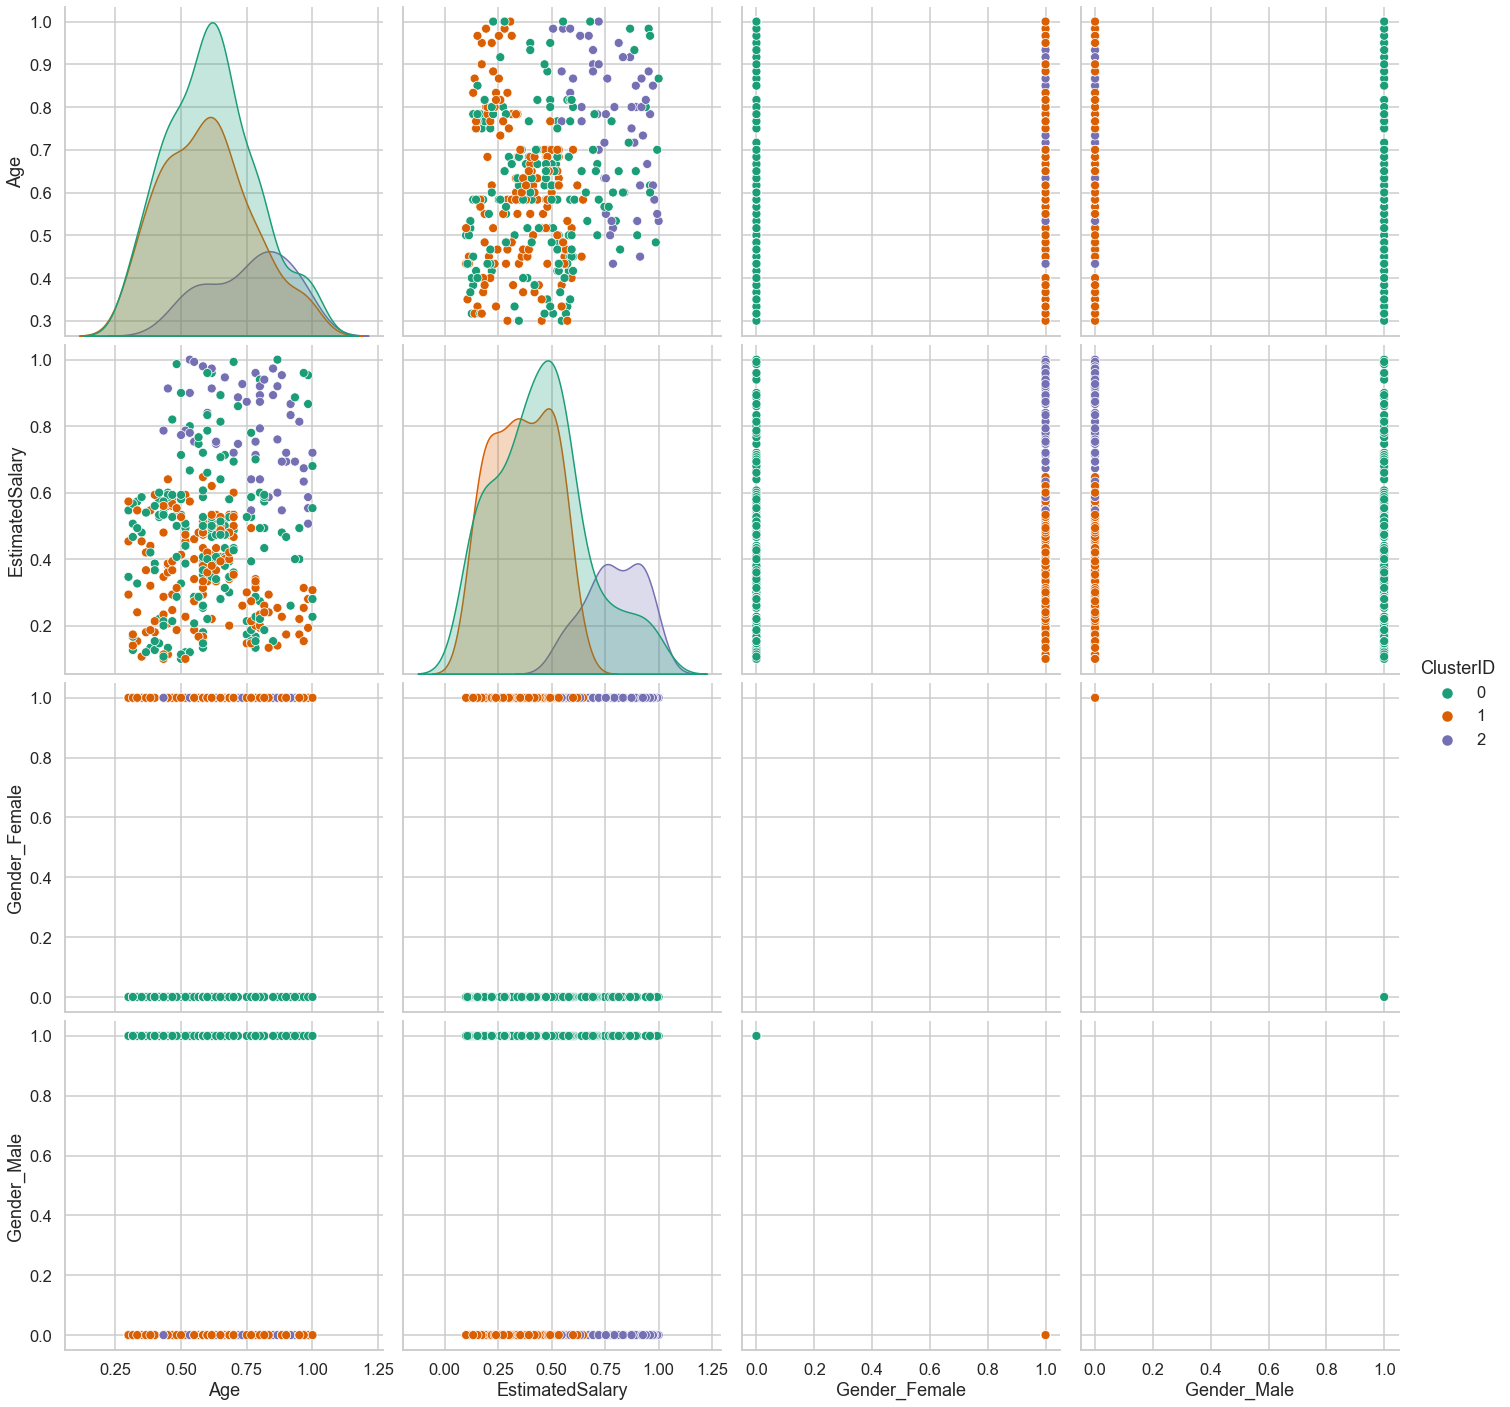

In [43]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.rcParams["lines.markeredgewidth"] = 1
sns.pairplot(data=ClusterDF, hue='ClusterID', palette='Dark2', height=5)

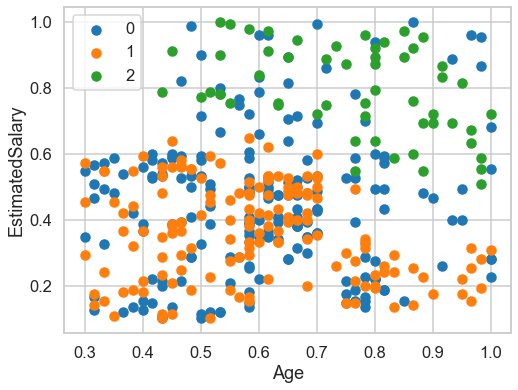

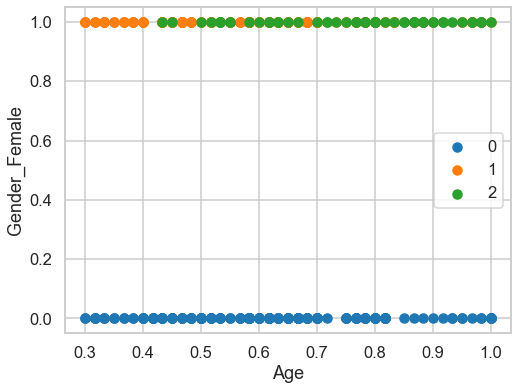

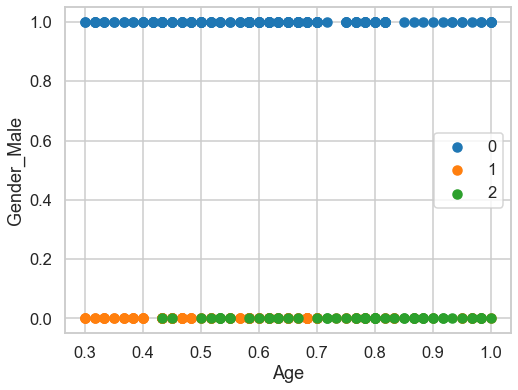

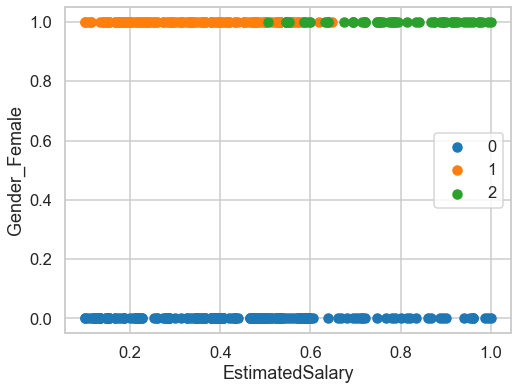

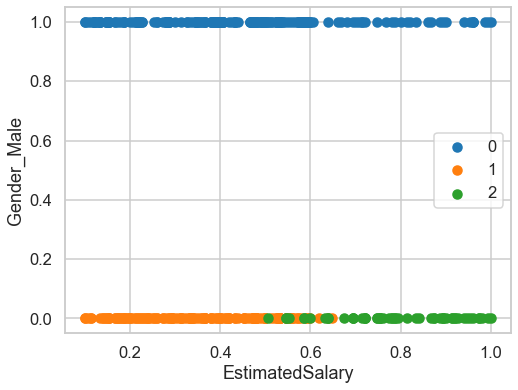

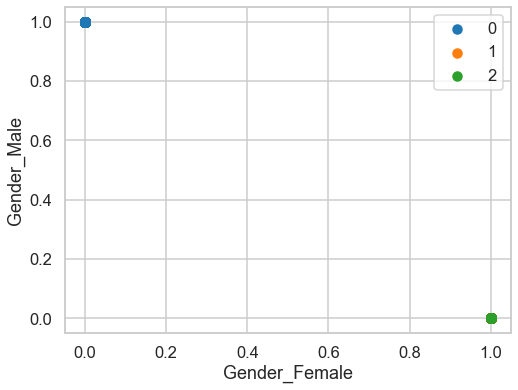

In [44]:
Plot2DCluster(X.columns,ClusterDF)

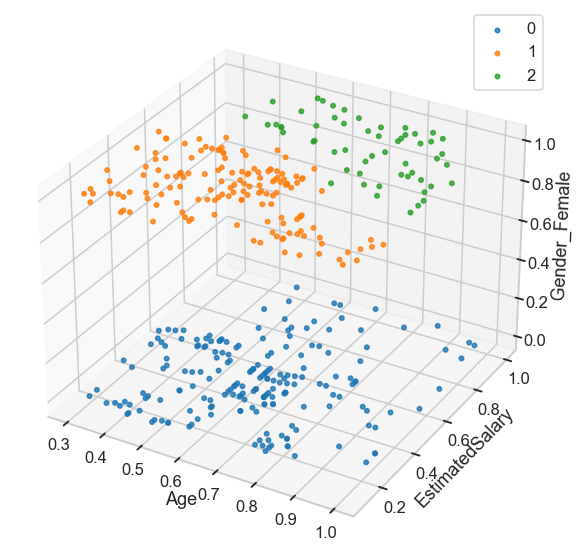

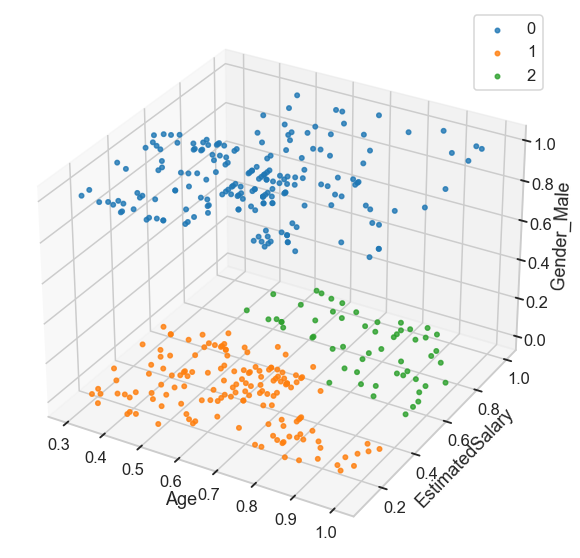

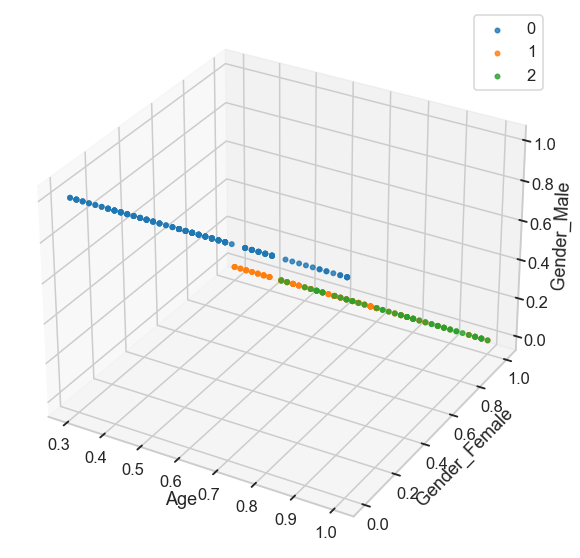

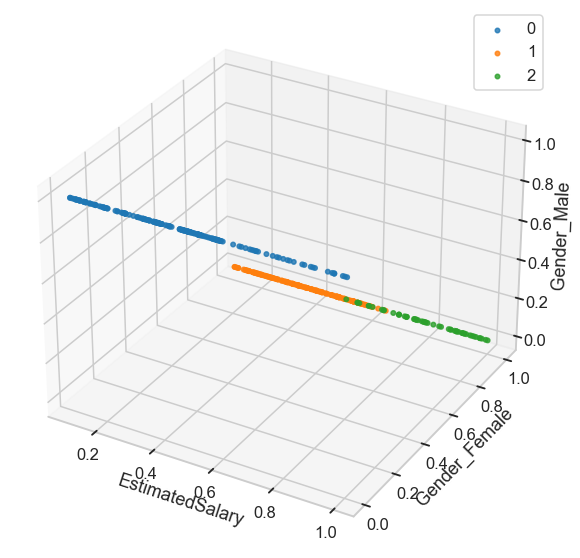

In [45]:
Plot3DCluster(X.columns,ClusterDF)

In [46]:
Plotly3D(X.columns,ClusterDF)

#### Creator: Neel Pawar, Github: [Profile]( https://github.com/neel-ntp)